# Group Activity  - Group 13
# Carry out the visualisation for the Telco-Customer-Curn data


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Reading excel file into a DataFrame as Displaying

In [33]:
dfChurnData = pd.read_excel('Telco-Customer-Churn.xlsx')
dfChurnData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Checking null data


In [5]:
dfChurnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 1. Comapre churn count with respect to gender

(<Figure size 432x288 with 3 Axes>,
 {('Female', 'No'): (0.0, 0.0, 0.4927796061577672, 0.7283634063823949),
  ('Female', 'Yes'): (0.0,
   0.7316856655186076,
   0.4927796061577672,
   0.2683143344813923),
  ('Male', 'No'): (0.49775473053587665,
   0.0,
   0.5022452694641234,
   0.7359434795407712),
  ('Male', 'Yes'): (0.49775473053587665,
   0.7392657386769838,
   0.5022452694641234,
   0.26073426132301614)})

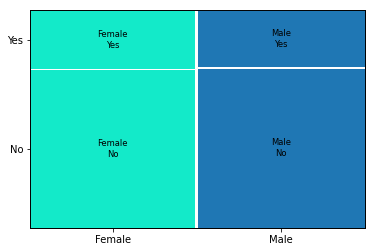

In [50]:
props={}
props[('Male','Yes')]={ 'edgecolor':'white'}
props[('Male','No')]={  'edgecolor':'white'}
props[('Female','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Female','No')]=        {'facecolor':'xkcd:aqua','edgecolor':'white'}
mosaic(dfChurnData,['gender','Churn'], properties=props)

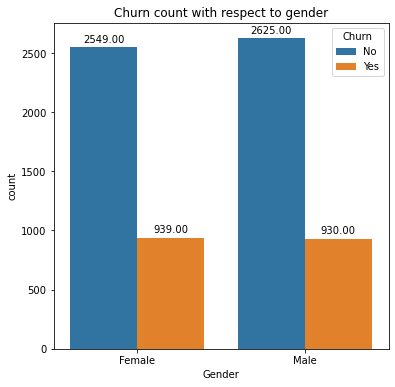

In [64]:
plt.figure(figsize=(6, 6 ))
cntplot= sns.countplot(data=dfChurnData,x='gender',hue='Churn')
plt.title('Churn count with respect to gender')
plt.xlabel('Gender')

for bar in gplot.patches:
   
  # Using Matplotlib's annotate function and
 
    cntplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()

# 2. Find out how many female senior citizens are there in the dataset

Text(0.5, 1.0, 'Senior citizens')

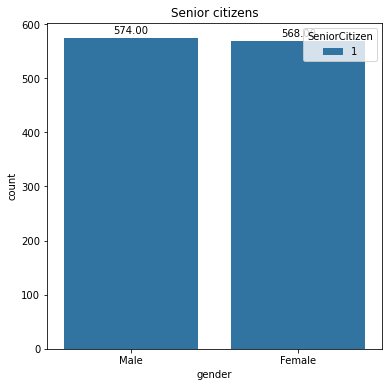

In [75]:
dfSenior = dfChurnData[ dfChurnData.SeniorCitizen==1]
plt.figure(figsize=(6, 6 ))
snrplt= sns.countplot(x ='gender', hue = "SeniorCitizen", data = dfSenior )
for bar in snrplt.patches:
   
  # Using Matplotlib's annotate function and
 
    snrplt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Senior citizens")

# 3.Compare 'Tenure' with 'Total Charges'

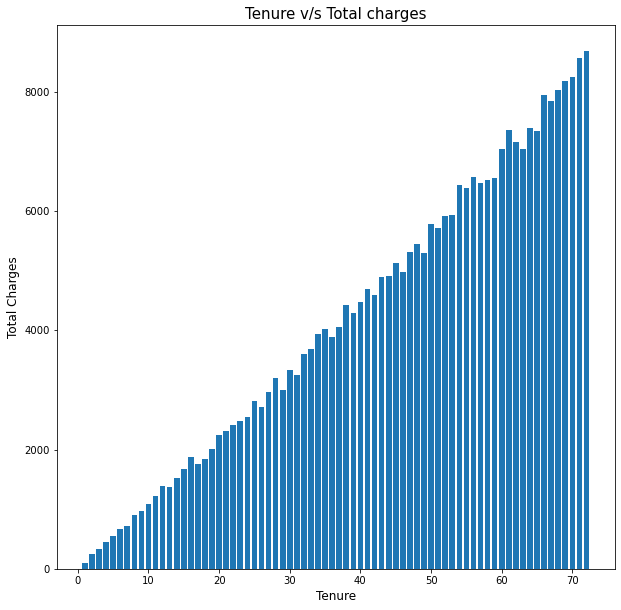

In [79]:
df2=pd.DataFrame(dfChurnData,columns=['tenure','TotalCharges'])
df2['TotalCharges']=pd.to_numeric(df2['TotalCharges'],errors='coerce')
df2['tenure']=pd.to_numeric(df2['tenure'],errors='coerce')
x=df2['tenure']
y=df2['TotalCharges']
plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.title('Tenure v/s Total charges',fontsize=15)
plt.xlabel('Tenure',fontsize=12)
plt.ylabel('Total Charges',fontsize=12)
plt.show()

# 4. Find out which contract preffered by the senior citizen

Text(0.5, 1.0, 'Contract by Senior citizens')

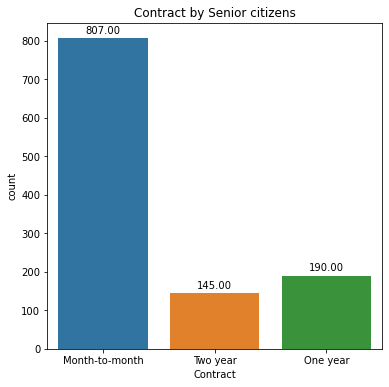

In [81]:
dfSenior = dfChurnData[ dfChurnData.SeniorCitizen==1]
plt.figure(figsize=(6, 6 ))
snrplt= sns.countplot(x ='Contract',  data = dfSenior )
for bar in snrplt.patches:
   
  # Using Matplotlib's annotate function and
 
    snrplt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Contract by Senior citizens")

# 5. Comment your finds on payment method

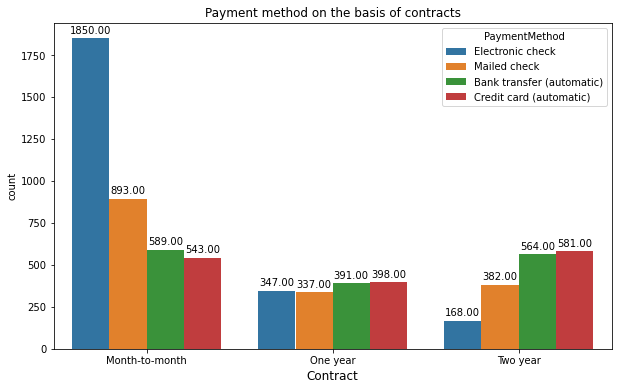

In [89]:
plt.figure(figsize=(10, 6 ))
payplot =  sns.countplot(data=dfChurnData,x='Contract',hue='PaymentMethod')
for bar in payplot.patches:
   
  # Using Matplotlib's annotate function and
 
    payplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Payment method on the basis of contracts')
plt.xlabel('Contract',fontsize=12)
plt.show()

# out of the 4 types of payment methods most of the 'Month-to-Month' customers prefer  Electronic check method
# Among the 'One year contract ' customers even though 'Credit card' method is used slightly more diffrence between each method is comparatively less
#  'Two Year ' contract customers prefer 'Credit Card' method and they use 'Electronic check ' very less


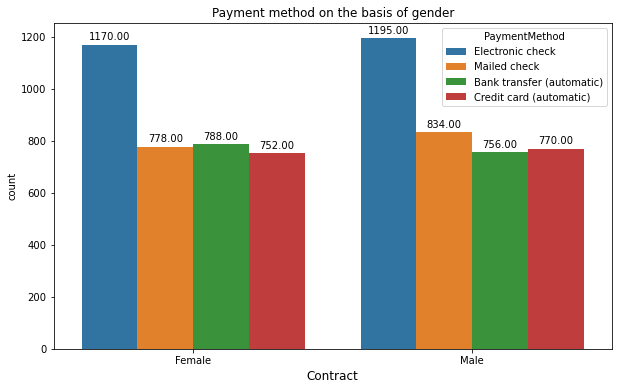

In [90]:
plt.figure(figsize=(10, 6 ))
payplot1 =  sns.countplot(data=dfChurnData,x='gender',hue='PaymentMethod')
for bar in payplot1.patches:
   
  # Using Matplotlib's annotate function and
 
    payplot1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Payment method on the basis of gender')
plt.xlabel('Contract',fontsize=12)
plt.show()

# Female as well as the male customers prefer Electronic check.